In [1]:
# Imports 
import pandas as pd
import numpy as np
import pylab as plt
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# histogram function

def pdf(data,upper,lower,size,name,xlab):
    bins_size = np.linspace(lower,upper,size)
    
    plt.figure()
    plt.hist(data, bins=bins_size, label=name)
    plt.xlabel(xlab)
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    #plt.savefig("Local/images/IO_wait_pdf_{}.png".format(name), bbox_inches="tight")
    


In [3]:
def profilingtimings_graph(iostat_path,cpu_mem_path,command,store):
    
    # loading the data from the txt files
    
    iostat_col3 = np.loadtxt(iostat_path,skiprows=6,usecols=3,dtype=str)
    iostat_col2 = np.loadtxt(iostat_path,skiprows=6,usecols=2,dtype=str)
    iostat_col3_wait = np.loadtxt(iostat_path,skiprows=3,usecols=3,dtype=str)

    
    cpu_mem_col2 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=0,dtype=str)
    cpu_mem_col3 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=3,dtype=str)
    cpu_mem_col4 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=4,dtype=str)
    
    # Splicing the data to get the correct data  from the output text and converted values into floats  
    iostat_kb_wrtn = list(map(float,iostat_col3[::5]))
    iostat_kb_read = list(map(float,iostat_col2[::5]))
    iostat_iowait  = list(map(float,iostat_col3_wait[::5]))
    
    ipn=np.where(cpu_mem_col2!="PID")[0]
    import more_itertools as mit
    ip=[list(group) for group in mit.consecutive_groups(ipn)]
    CPU=[]
    MEM=[]
    for i in range(len(ip)):
        ip1=ip[i]
        try:
            CPU.append(sum(list(map(float, cpu_mem_col3[ip1]))))
            MEM.append(sum(list(map(float, cpu_mem_col4[ip1]))))
        except:
            CPU.append(0.0)
            MEM.append(0.0)
    
    # The code sleeps for 10s after each command has finished running 
    
    sleep =-10
    
    # Plotting
    
    plt.figure()
    
    plt.plot(np.arange(0,len(iostat_kb_wrtn[1:sleep]),1),np.cumsum(iostat_kb_wrtn[1:sleep]),label="kb_wrtn")
    plt.xlabel("Elasped Time (secs)")
    plt.ylabel("size (KB)")
    plt.title("{}_{}_IO_wrtn".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("Local/images/IO_write_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(iostat_kb_read[1:sleep]),1),np.cumsum(iostat_kb_read[1:sleep]),label="kb_read")
    #plt.plot(np.arange(0,len(iostat_kb_wrtn),1),iostat_kb_wrtn,label="kb_wrtn/s")
    plt.xlabel("Elasped Time (secs)")
    plt.title("{}_{}_IO_read".format(store,command))
    plt.ylabel("size (KB)")
    plt.legend(loc='best')
    #plt.savefig("Local/images/IO_read_{}.png".format(command), bbox_inches="tight")

    plt.figure()
    plt.plot(np.arange(0,len(iostat_iowait[1:sleep]),1),iostat_iowait[1:sleep],label="iowait")
    plt.xlabel("Elasped time (secs)")
    plt.title("{}_{}_IO_wait".format(store,command))
    plt.ylabel("Usage (%)")
    plt.legend(loc='best')
    #plt.savefig("Local/images/IO_wait_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(CPU),1),CPU,label="CPU")
    #print(CPU)
    plt.xlabel("Elasped Time (secs)")
    plt.title("{}_{}_CPU".format(store,command))
    plt.ylabel("Usage (%)")
    plt.legend(loc='best')
    #plt.savefig("Local/images/IO_CPU_{}.png".format(command), bbox_inches="tight")


    plt.figure()
    plt.plot(np.arange(0,len(MEM),1),MEM,label="RAM")
    #print(MEM)
    plt.xlabel("Elasped Time (secs)")
    plt.title("{}_{}_RAM".format(store,command))
    plt.ylabel("Usage (%)")
    plt.legend(loc='best')
    #plt.savefig("Local/images/IO_MEM_{}.png".format(command), bbox_inches="tight")
    
    return  
    

In [4]:
def profilingtimings(iostat_path,cpu_mem_path,command):
    
    # loading the data from the txt files
    
    iostat_col3 = np.loadtxt(iostat_path,skiprows=6,usecols=3,dtype=str)
    iostat_col2 = np.loadtxt(iostat_path,skiprows=6,usecols=2,dtype=str)
    iostat_col3_wait = np.loadtxt(iostat_path,skiprows=3,usecols=3,dtype=str)

    
    cpu_mem_col2 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=0,dtype=str)
    cpu_mem_col3 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=3,dtype=str)
    cpu_mem_col4 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=4,dtype=str)
    
    # Splicing the data to get the vprrect data pint from the output text and convertvalues into floats
    
    iostat_kb_wrtn = list(map(float,iostat_col3[::5]))
    iostat_kb_read = list(map(float,iostat_col2[::5]))
    iostat_iowait  = list(map(float,iostat_col3_wait[::5]))
    
    ipn=np.where(cpu_mem_col2!="PID")[0]
    import more_itertools as mit
    ip=[list(group) for group in mit.consecutive_groups(ipn)]
    CPU=[]
    MEM=[]
    for i in range(len(ip)):
        ip1=ip[i]
        try:
            CPU.append(sum(list(map(float, cpu_mem_col3[ip1]))))
            MEM.append(sum(list(map(float, cpu_mem_col4[ip1]))))
        except:
            CPU.append(0.0)
            MEM.append(0.0)
            

    return len(CPU) ,sum(iostat_kb_wrtn),sum(iostat_kb_read ),np.median(CPU),np.median(MEM), np.mean(iostat_iowait)
    
    
    
    

In [7]:
# function that create the paths to the txt file 

def path(storage,command):
    cpu = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_cpu_mem.txt" .format(storage,command)
    io = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_iostat.txt" .format(storage,command)
    return cpu , io 

# command line task / pipetasks

com=["processccd","coaddtions","multiband"]

# end point storages

store =["Local_cd", "Local"]

# print formatting 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   NEXT ='\n'

In [8]:
# collating all the data into a list 
col1= []
for i in range(len(store)):
    for j in range(len(com)):
        times,sum_wrtn,sum_read,mean_cpu,mean_ram,mean_iowait = profilingtimings(path(store[i],com[j])[1],path(store[i],
                                                                                 com[j])[0],com[j])
    
        col1.append(times)
        col1.append(sum_read*1e-3)
        col1.append(sum_wrtn*1e-3)
        col1.append(mean_iowait)
        col1.append(mean_cpu)
        col1.append(mean_ram)

        


In [9]:
# Creating a Table of the data 

print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[0]) + color.END)
d = {'Processccd': col1[:6], 'Coaddtions': col1[6:12],'Multiband': col1[12:18]}
df = pd.DataFrame(data=d, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df.round(2)


Local_cd (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),528.00,675.00,9601.00
Total reads (disk + network) (MB),406.32,13081.68,2638.18
Total writes (disk + network) (MB),10364.74,25609.56,6771.63
Average io wait (%),0.78,3.48,0.05
Average CPU usage (%) (8 cores = 800% ),768.30,659.10,200.20
Average RAM usage (%) (32GB),10.90,33.00,41.90


In [10]:
print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[1]) + color.END)
d = {'Processccd': col1[18:24], 'Coaddtions': col1[24:30],'Multiband': col1[30:36]}
df = pd.DataFrame(data=d, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df.round(2)


Local (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),572.00,723.00,8937.00
Total reads (disk + network) (MB),747.16,2198.79,1518.80
Total writes (disk + network) (MB),5421.36,5240.18,4694.24
Average io wait (%),0.57,0.32,0.03
Average CPU usage (%) (8 cores = 800% ),771.85,772.40,200.30
Average RAM usage (%) (32GB),11.00,31.50,43.70


<ipython-input-198-1159454c3113>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


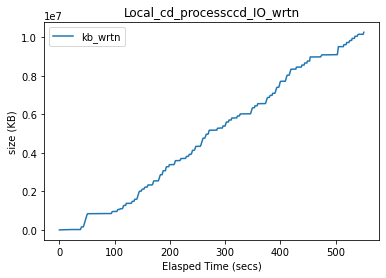

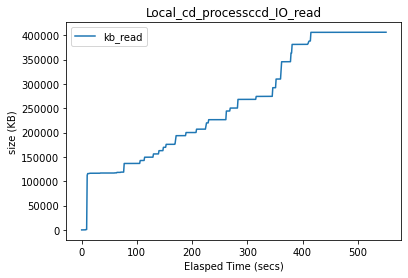

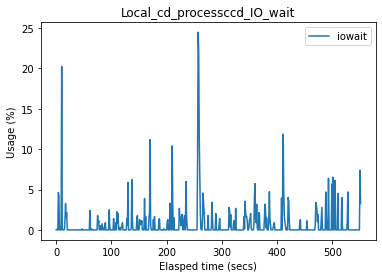

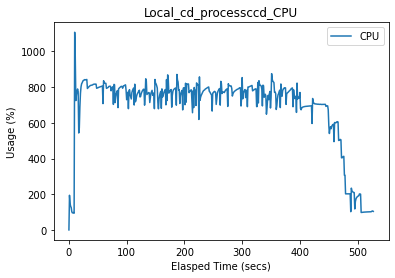

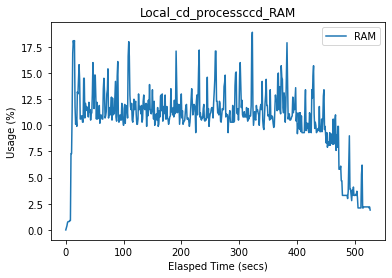

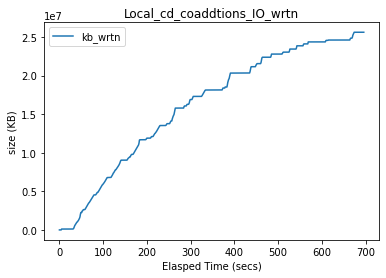

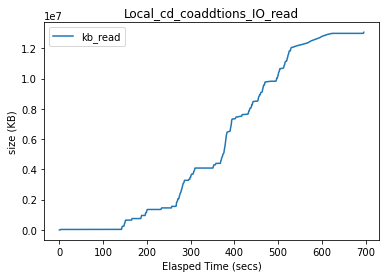

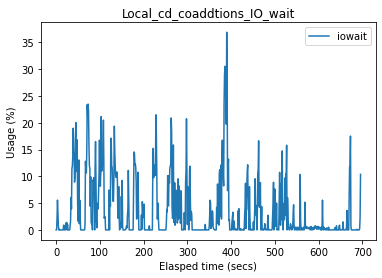

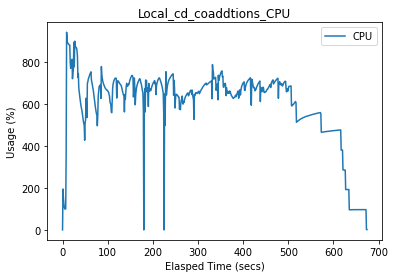

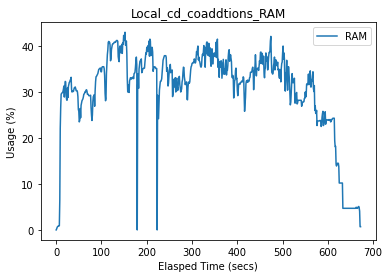

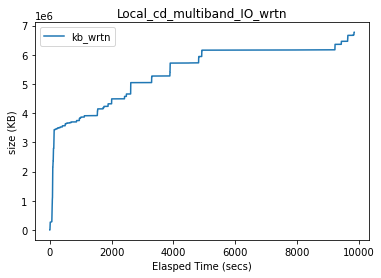

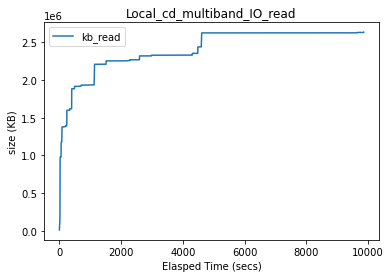

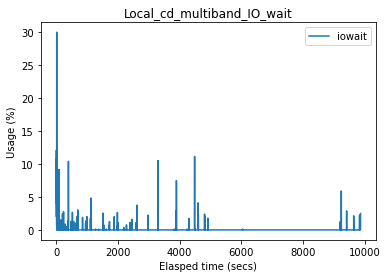

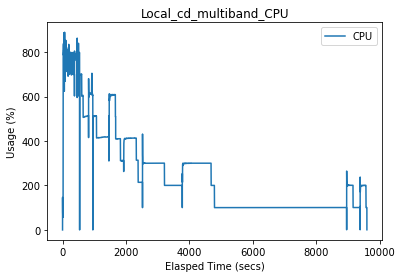

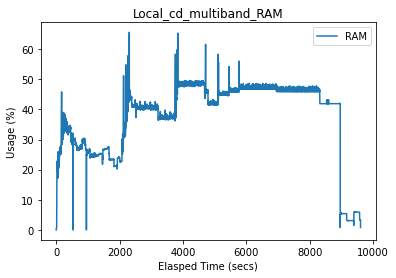

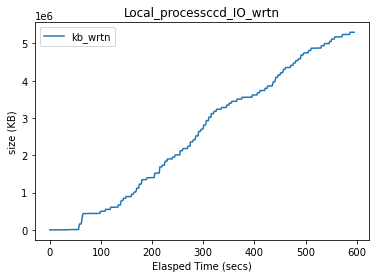

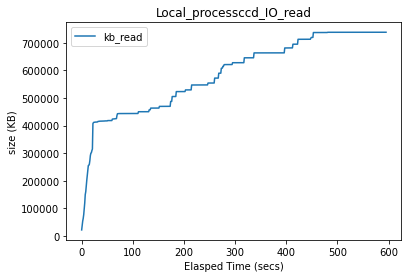

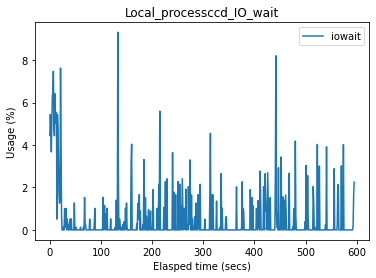

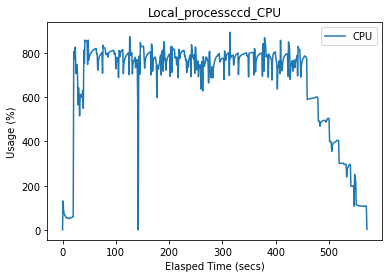

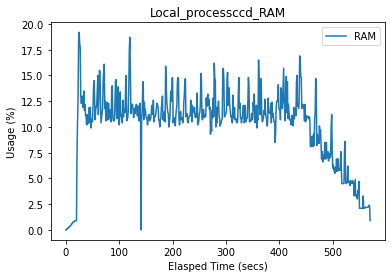

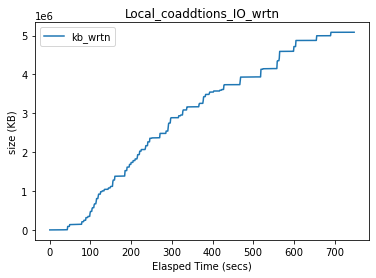

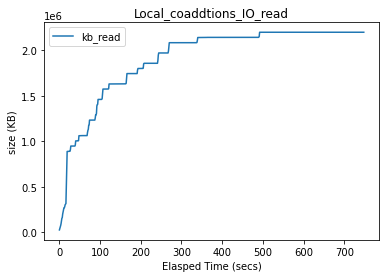

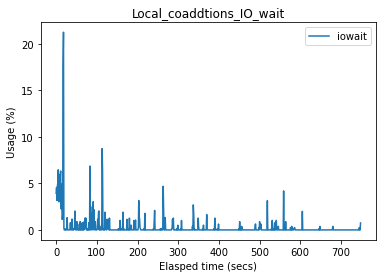

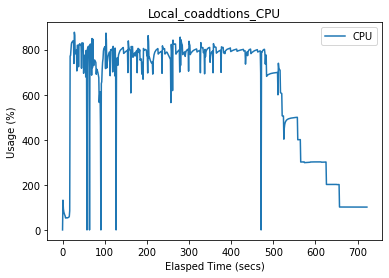

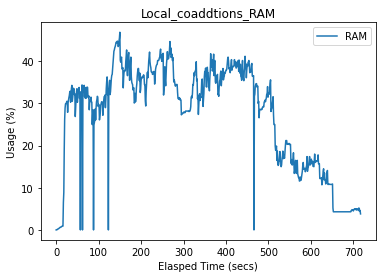

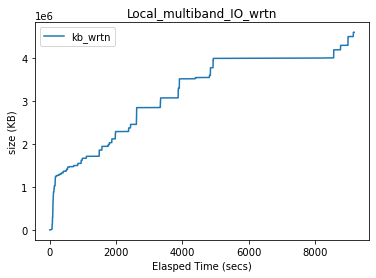

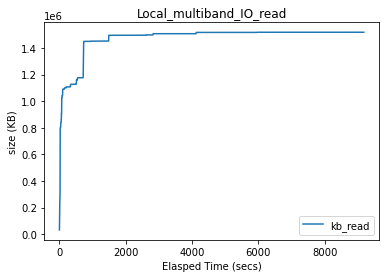

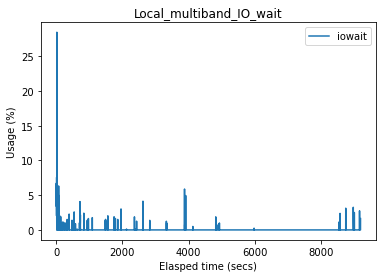

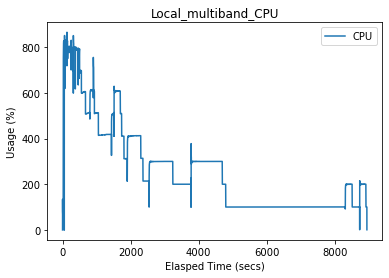

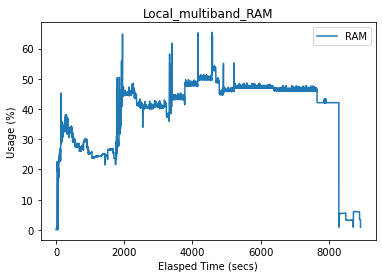

In [218]:
# Plottiing all of the profiliing plots 
for i in range(len(store)):
    for j in range(len(com)):
        times = profilingtimings_graph(path(store[i],com[j])[1],path(store[i],com[j])[0],com[j],store[i])
      

In [ ]:
cpu_mem_col2 = np.loadtxt("Time_test/7/Local/processccd/info_cpu_mem.txt",skiprows=0,usecols=0,dtype=str)
cpu_mem_col3 = np.loadtxt("Time_test/7/Local/processccd/info_cpu_mem.txt",skiprows=0,usecols=3,dtype=str)
cpu_mem_col4 = np.loadtxt("Time_test/7/Local/processccd/info_cpu_mem.txt",skiprows=0,usecols=4,dtype=str)
#print(cpu_mem_col4)

ipn=np.where(cpu_mem_col2!="PID")[0]
ipn2=np.where(cpu_mem_col2=="PID")[0]
import more_itertools as mit

import decimal

def extract_nums(text):
    for item in text.split(','):
        try:
            yield decimal.Decimal(item)
        except decimal.InvalidOperation:
            pass
        
#iterable = [2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 20]
ip=[list(group) for group in mit.consecutive_groups(ipn)]

ram_t=[]
cpu_t=[]
for i in range(len(ip)):
    ip1=ip[i]
    try:
        cpu_t.append(sum(list(map(float, cpu_mem_col3[ip1]))))
        ram_t.append(sum(list(map(float, cpu_mem_col4[ip1]))))
    except:
        cpu_t.append(0)
        ram_t.append(0)

print(ram_t[141])